### Install necessary packages

In [1]:
install.packages('kernlab')
install.packages('randomForest')
install.packages('ellipse')
install.packages('ggplot2')
install.packages('caret')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘randomForest’ is not available for this version of R
‘randomForest’ version 4.7-1.1 is in the repositories but depends on R (>= 4.1.0)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Load the installed package

In [2]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



### Load in data file

In [3]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

### Develop model around large percentage of data then test its accuracy with unseen data

### 80% of data to train model

### 20% of data to validate

In [4]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

### Display data dimensions (rows and columns)

In [5]:
# dimensions of dataset
dim(dataset)

[1] 120   5

### Display the types of each attribute

In [6]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### Display first 5 rows of the data

In [7]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


### Display levels of the class variable

In [8]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### Display number of rows in each class

In [9]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### Summarize attributes of statistics

In [10]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.200   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.750   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.856   Mean   :3.058   Mean   :3.753   Mean   :1.197  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

### Visualize distribution of data through univariate plots

### Set input attributes as x and output attributes as y

In [11]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

### Generate box and whiskers plots for each variable

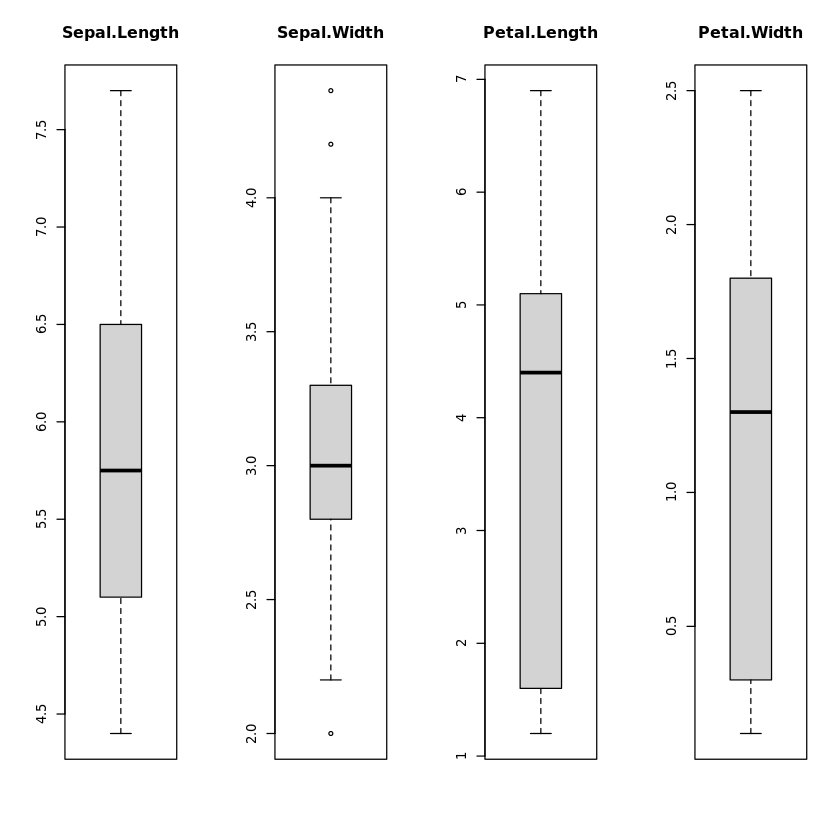

In [12]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

### Generate barplots for each variable

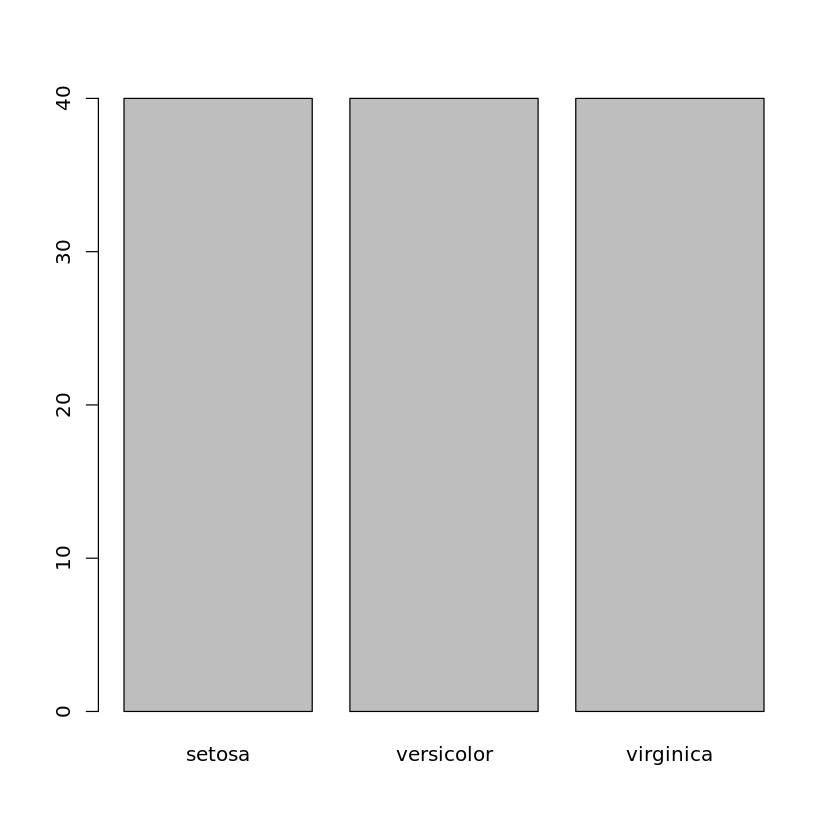

In [13]:
# barplot for class breakdown
plot(y)

### Visualize interactions between variables through multivariate plots

### Generate scatterplots of all pairs of attributes

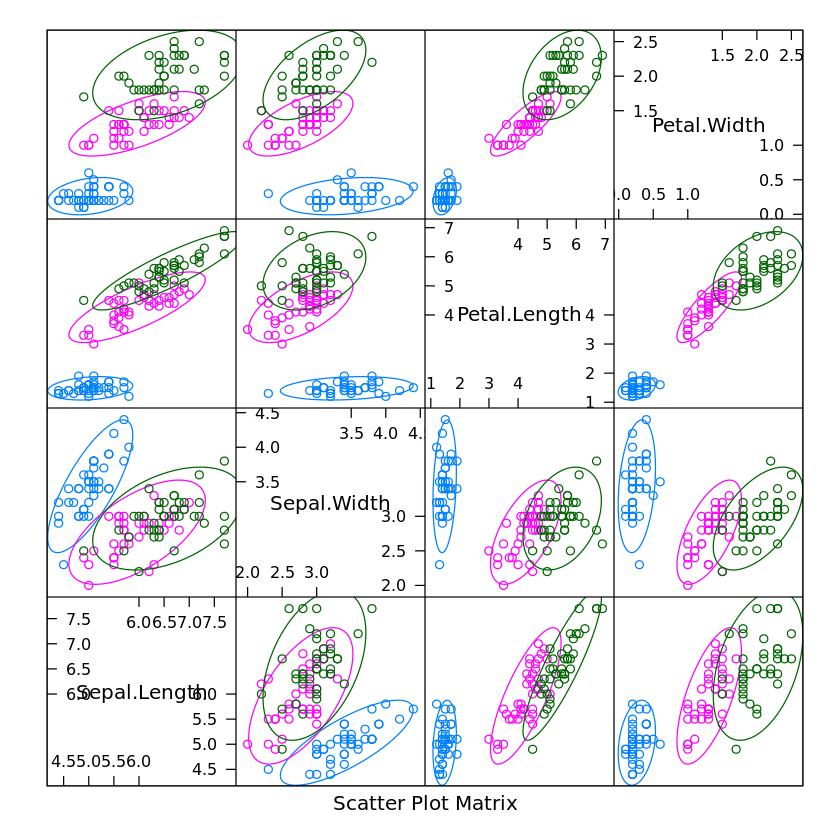

In [14]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

### Generate box and whiskers plots to visualize linear separations

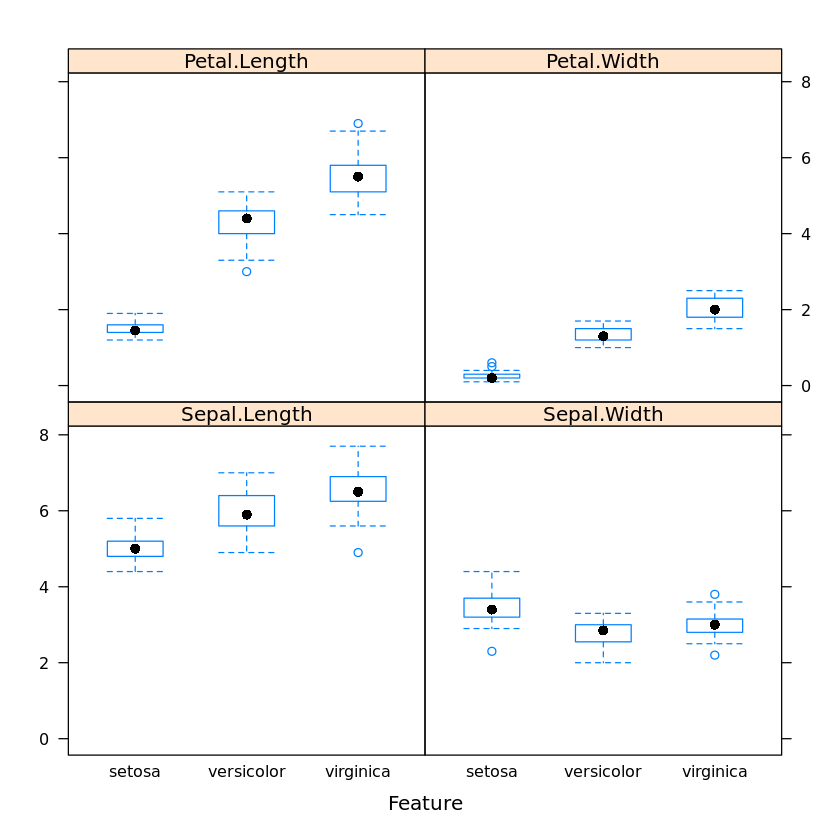

In [15]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

### Generate probability density plots to visualize distributions

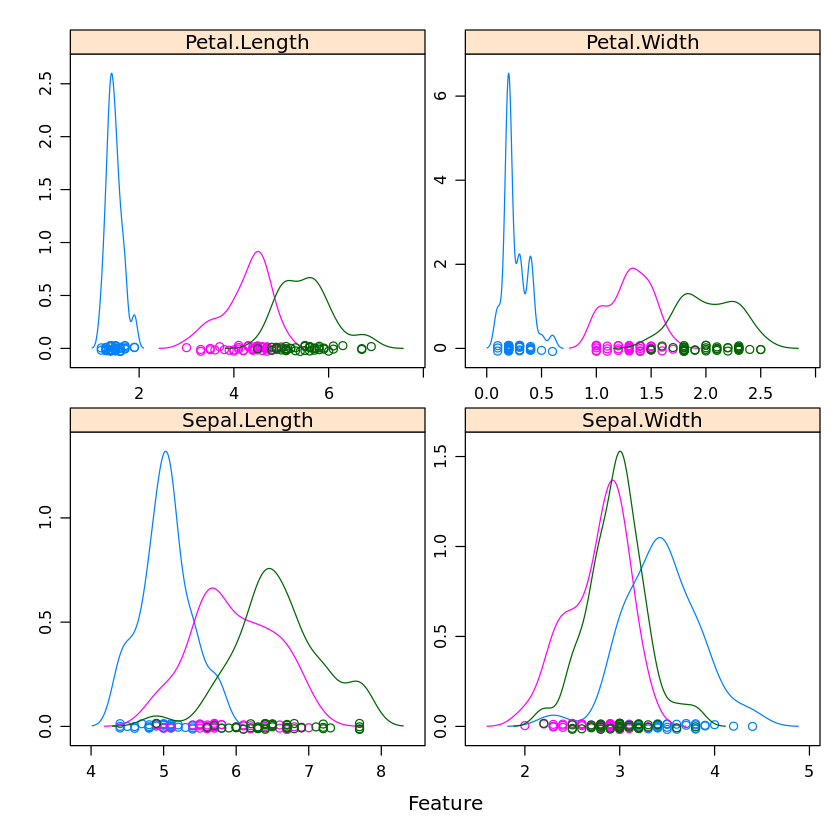

In [16]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

### 10-fold crossvalidation

### Split data into 10 parts, train on 9, test on 1; repeat process 3 times

In [17]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Install older version of randomForest that is compatible with current version of r

In [18]:
install.packages("remotes")
remotes::install_version("randomForest", version = "4.6-14")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




### Evaluate 5 different models

### Build each model and accuracy estimation

In [19]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### Summarize model accuracy

In [20]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9500000       1    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
svm  0.8333333 0.9166667 0.9166667 0.9416667       1    1    0
rf   0.9166667 0.9166667 0.9583333 0.9583333       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750   1.000 1.0000 0.9750       1    1    0
cart 0.750   0.875 0.9375 0.9250       1    1    0
knn  0.875   1.000 1.0000 0.9750       1    1    0
svm  0.750   0.875 0.8750 0.9125       1    1    0
rf   0.875   0.875 0.9375 0.9375       1    1    0


### Compare model accuracies

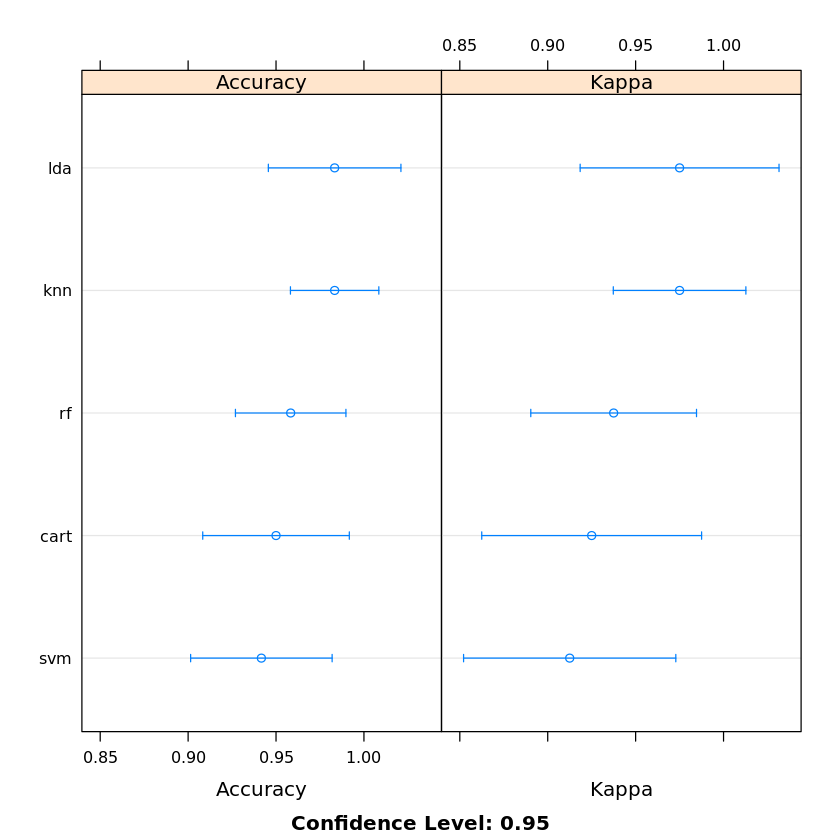

In [21]:
# compare accuracy of models
dotplot(results)

### Summarize the most accurate model, LDA

In [22]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



### Test accuracy of LDA model on validation set, summarize results in confusion matrix

In [23]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
P